In [ ]:
# DO NOT RUN THIS CELL IF YOU ARE EXECUTING THE NOTEBOOK LOCALLY!
# This is purely for setting up the environment on Google Colab

%%capture
!pip install mcramp

How to create an IDF
====================

It is possible to create an instrument entirely from inside a Python script, as JSON maps directly onto the structure of Python dictionaries. Let us use this approach to construct the powder diffractometer from the introductory example. This notebook will be light on the details of how instrument definition files are structued in RAMP, however a detailed description of this can be found [in the documentation](https://ramp-mcr.readthedocs.io/en/latest/user/idf.html).

In [1]:
idf = {}

The first step is to define the execution blocks in the instrument. In this case, the whole instrument is going to be executed in a linear fashion, so only a single execution block is required.

In [3]:
idf["all"] = all_block = {"linear" : True}

The shorthand used here of `idf["all"] = all_block = ...` is called aliasing, and prevents us having to nest a long string of dictionary keys to access elements in the IDF tree, instead aliasing nested elements to top level variable names. Now we shall go on to define the moderator

In [7]:
all_block["Source"] = source = {"source": True}
source["position"] = [0.0, 0.0, 0.0]
source["moderator_kernel"] = {
    "name": "MCont",
    "mod_dim": [0.01, 0.01],
    "target_dim": [0.01, 0.01],
    "target_dist": 1.0,
    "E_min": 8.5,
    "E_max": 9.5,
    "T1" : 216.8,
    "I1" : 1.24e13,
    "T2" : 33.9,
    "I2" : 1.02e13,
    "T3" : 16.7,
    "I3" : 3.0423e12
}
idf

{'all': {'linear': True,
  'Source': {'source': True,
   'position': [0.0, 0.0, 0.0],
   'moderator_kernel': {'name': 'MCont',
    'mod_dim': [0.01, 0.01],
    'target_dim': [0.01, 0.01],
    'target_dist': 1.0,
    'E_min': 8.5,
    'E_max': 9.5,
    'T1': 216.8,
    'I1': 12400000000000.0,
    'T2': 33.9,
    'I2': 10200000000000.0,
    'T3': 16.7,
    'I3': 3042300000000.0}}}}

The rest of the instrument definition follows similarly, adding a component at a time to `all_block`

In [9]:
all_block["Mono_arm"] = Mono_arm = {}
Mono_arm["position"] = [0.0, 0.0, 1.0]
Mono_arm["rotation"] = [0.0, 0.4635, 0.0]
Mono_arm["geom_kernel"] = { "name" : "GArm" }
Mono_arm["scat_kernel"] = { "name" : "SArm" }

all_block["Mono_out"] = Mono_out = {}
Mono_out["position"] = [0.0, 0.0, 1.0]
Mono_out["rotation"] = [0.0, 2*0.4635, 0.0]
Mono_out["geom_kernel"] = { "name" : "GArm" }
Mono_out["scat_kernel"] = { "name" : "SArm" }

all_block["Mono"] = Mono = {}
Mono["position"] = [0.0, 0.0, 0.0]
Mono["rotation"] = [0.0, 0.0, 0.0]
Mono["relative"] = "Mono_arm"
Mono["geom_kernel"] = {
    "name" : "GPlane",
    "width" : 0.10,
    "height" : 0.10,
    "orientation" : "yz"
}
Mono["scat_kernel"] = {
    "name" : "SMonochromator",
    "slab_width" : 0.1,
    "slab_height" : 0.1,
    "mosaic_horizontal" : 10,
    "mosaic_vertical" : 10,
    "r0" : 1.0,
    "d_spacing" : 3.355
}

all_block["Sample"] = Sample = {}
Sample["position"] = [0.0, 0.0, 0.5]
Sample["relative"] = "Mono_out"
Sample["geom_kernel"] = { "name" : "GSphere", "radius" : 0.01 }
Sample["scat_kernel"] = {
    "name": "SPowder1",
    "d_spacing" : 3.0,
    "pack" : 1.0,
    "vc" : 75.0,
    "sigma_abs" : 0.0,
    "multiplicity" : 1,
    "DW" : 1.0,
    "F2" : 500.0,
    "d_phi" : 5.0
}

all_block["Detector"] = Detector = {}
Detector["position"] = [0.0, 0.0, 0.0]
Detector["relative"] = "Sample"
Detector["geom_kernel"] = {
    "name" : "GBanana",
    "radius" : 1.0,
    "height" : 0.2,
    "mintheta" : -40.0,
    "maxtheta" : 140.0
}
Detector["scat_kernel"] = {
    "name" : "SDetector1D",
    "var" : "theta",
    "binning" : [50.0, 0.02, 70.0],
    "filename" : "detector"
}

idf

{'all': {'linear': True,
  'Source': {'source': True,
   'position': [0.0, 0.0, 0.0],
   'moderator_kernel': {'name': 'MCont',
    'mod_dim': [0.01, 0.01],
    'target_dim': [0.01, 0.01],
    'target_dist': 1.0,
    'E_min': 8.5,
    'E_max': 9.5,
    'T1': 216.8,
    'I1': 12400000000000.0,
    'T2': 33.9,
    'I2': 10200000000000.0,
    'T3': 16.7,
    'I3': 3042300000000.0}},
  'Mono_arm': {'position': [0.0, 0.0, 1.0],
   'rotation': [0.0, 0.4635, 0.0],
   'geom_kernel': {'name': 'GArm'},
   'scat_kernel': {'name': 'SArm'}},
  'Mono_out': {'position': [0.0, 0.0, 1.0],
   'rotation': [0.0, 0.927, 0.0],
   'geom_kernel': {'name': 'GArm'},
   'scat_kernel': {'name': 'SArm'}},
  'Mono': {'position': [0.0, 0.0, 0.0],
   'rotation': [0.0, 0.0, 0.0],
   'relative': 'Mono_arm',
   'geom_kernel': {'name': 'GPlane',
    'width': 0.1,
    'height': 0.1,
    'orientation': 'yz'},
   'scat_kernel': {'name': 'SMonochromator',
    'slab_width': 0.1,
    'slab_height': 0.1,
    'mosaic_horizontal':

Now the IDF has been constructed as a Python dictionary, it can be saved as a JSON file.

In [10]:
import json

with open('powder.json', 'w') as f:
    json.dump(idf, f)

The resultant JSON file can now be used to initialize an instrument in RAMP.

In [11]:
import mcramp as mcr
import pyopencl as cl

ctx = cl.create_some_context()
queue = cl.CommandQueue(ctx)
inst = mcr.Instrument(
    'powder.json', 
    ctx, 
    queue
)

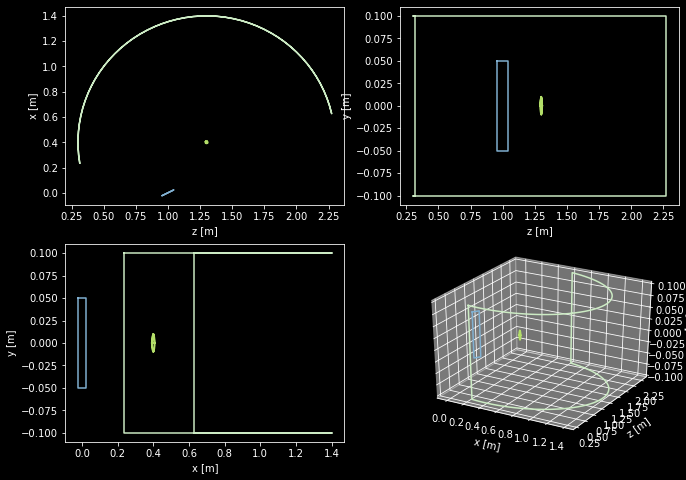

In [13]:
inst.visualise(figsize=(11, 8), controls=False)

For creating instruments locally, this approach might be more unwieldy than writing the IDF JSON file by hand - however this could be useful when writing instruments using notebooks.